PROYECTO 2: PREDICCIÓN DE EFICIENCIA EN BOMBAS CENTRÍFUGAS

Dataset de Eficiencia en Bombas Centrífugas:
Tamaño del dataset: 400 registros

Primeras 8 filas:
   caudal_m3h  presion_bar  velocidad_rpm  diametro_impulsor_mm  \
0  363.411134    16.406765    2129.268492            354.863905   
1  178.762701    11.995050    2534.063003            276.375737   
2  152.083154    28.322291    1233.945133            391.357766   
3  298.091646    12.858784    3234.352789            314.522249   
4  373.761036    27.742867    3412.607668            298.309475   
5  240.397907     6.085452    2521.271257            207.380862   
6  491.343889    22.677877    1843.250680            329.675016   
7  358.173382    17.097226    3576.573601            222.050322   

   eficiencia_porcentaje  
0              40.000000  
1              40.000000  
2              70.489843  
3              40.000000  
4              40.000000  
5              40.000000  
6              40.000000  
7              40.0000

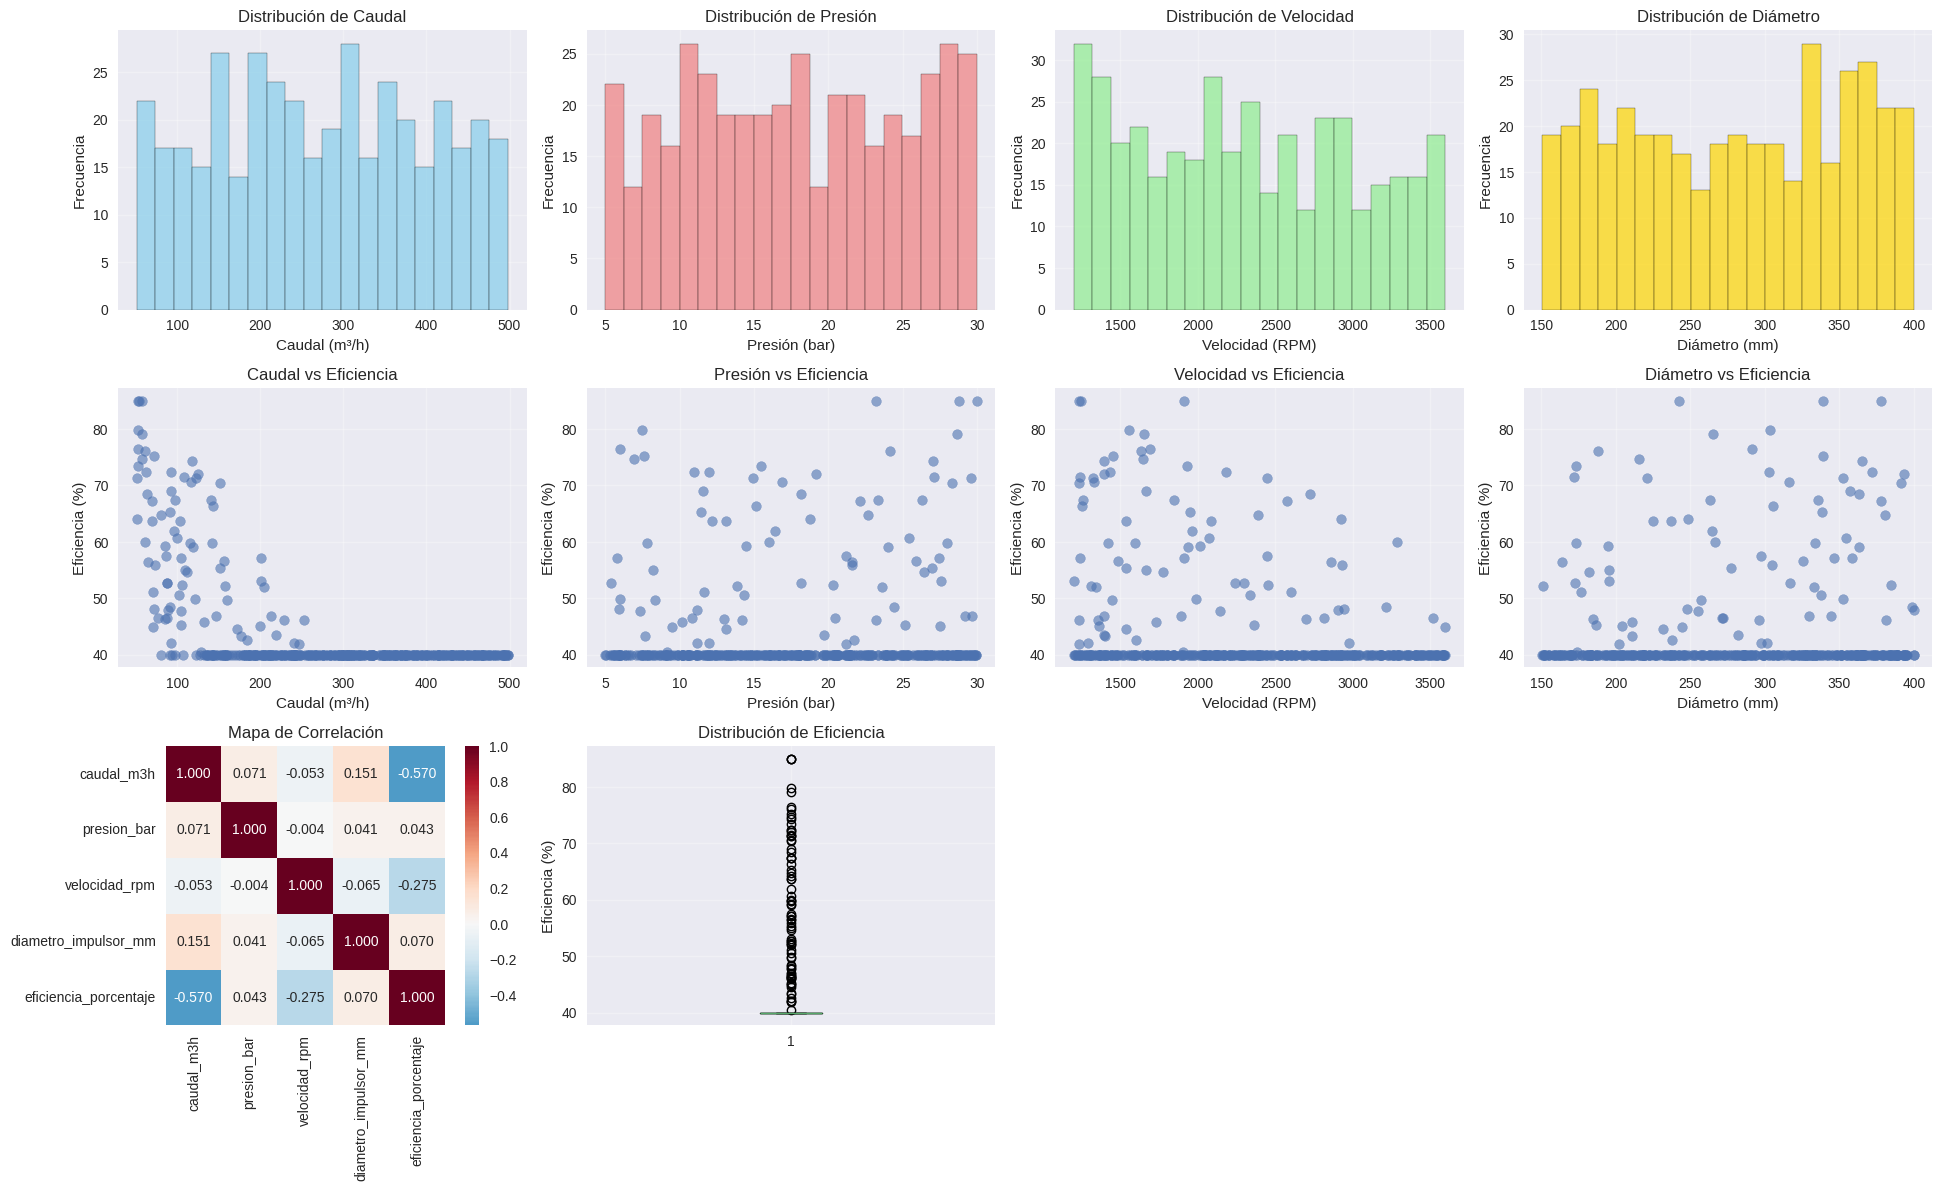


DIVISIÓN DE DATOS:
Conjunto de entrenamiento: 300 muestras
Conjunto de prueba: 100 muestras

MODELO DE REGRESIÓN LINEAL MÚLTIPLE

PARÁMETROS DEL MODELO:
Intercepto (β₀): 57.2053
Coeficiente para Caudal (β₁): -0.045770
Coeficiente para Presión (β₂): 0.156751
Coeficiente para Velocidad (β₃): -0.003691
Coeficiente para Diámetro (β₄): 0.017114

MÉTRICAS DE EVALUACIÓN:
Error Cuadrático Medio (MSE): 39.4208
Raíz del Error Cuadrático Medio (RMSE): 6.2786
Error Absoluto Medio (MAE): 4.7939
Coeficiente de Determinación R²: 0.4150


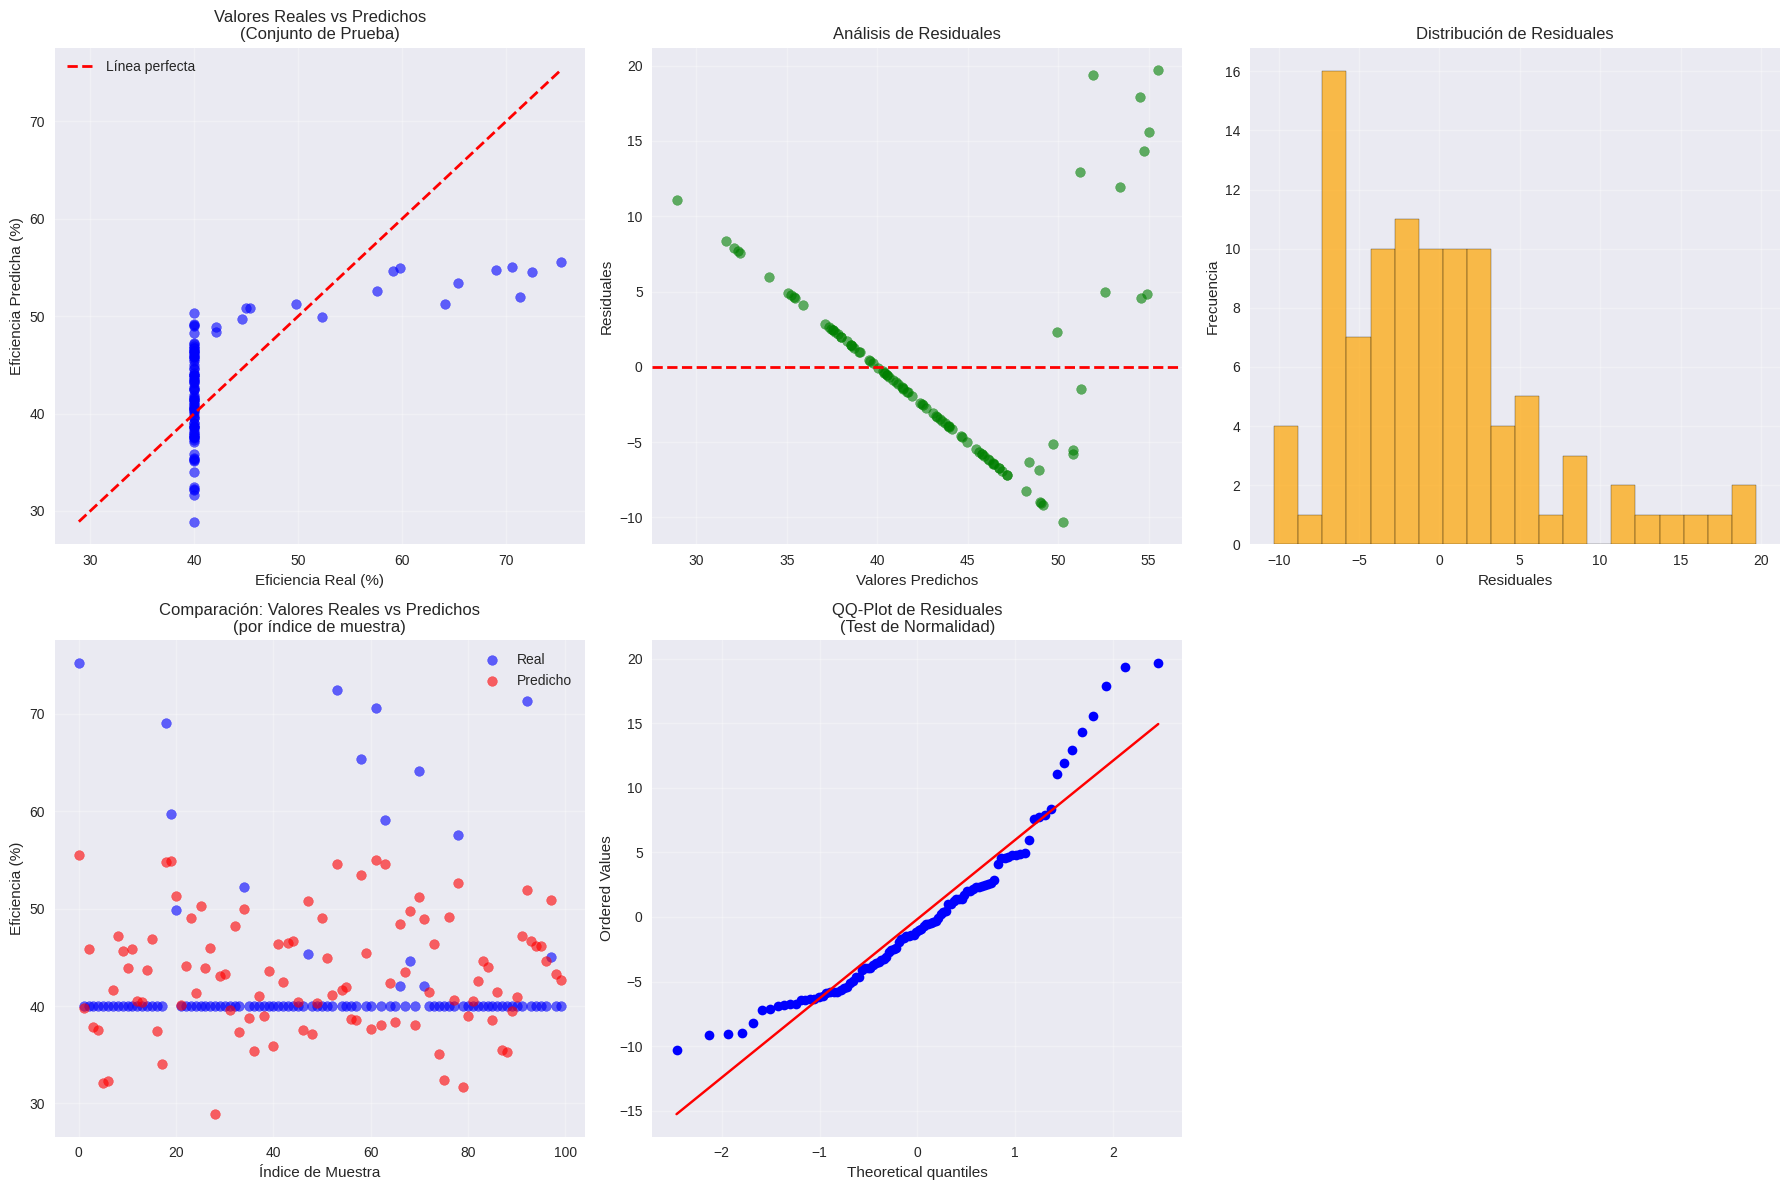


ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
      Característica  Coeficiente  Abs_Coeficiente
         presion_bar     0.156751         0.156751
          caudal_m3h    -0.045770         0.045770
diametro_impulsor_mm     0.017114         0.017114
       velocidad_rpm    -0.003691         0.003691

CASOS DE ESTUDIO EN INGENIERÍA

Predicciones para configuraciones típicas de bombas:

Configuración 1:
  • Caudal: 100 m³/h
  • Presión: 10 bar
  • Velocidad: 1800 RPM
  • Diámetro: 200 mm
  → Eficiencia predicha: 50.98%

Configuración 2:
  • Caudal: 300 m³/h
  • Presión: 20 bar
  • Velocidad: 2400 RPM
  • Diámetro: 300 mm
  → Eficiencia predicha: 42.89%

Configuración 3:
  • Caudal: 450 m³/h
  • Presión: 8 bar
  • Velocidad: 3000 RPM
  • Diámetro: 250 mm
  → Eficiencia predicha: 31.07%

Configuración 4:
  • Caudal: 200 m³/h
  • Presión: 25 bar
  • Velocidad: 1500 RPM
  • Diámetro: 350 mm
  → Eficiencia predicha: 52.42%

Configuración 5:
  • Caudal: 350 m³/h
  • Presión: 15 bar
  • Velocidad

In [1]:
# PASO 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from scipy import stats

# Configuración de estilo
plt.style.use('seaborn-v0_8')
print("PROYECTO 2: PREDICCIÓN DE EFICIENCIA EN BOMBAS CENTRÍFUGAS")
print("="*60)

# PASO 2: Generación del dataset sintético de ingeniería (400 puntos)
np.random.seed(123)
n_samples = 400

# Variables de ingeniería para bombas centrífugas
caudal = np.random.uniform(50, 500, n_samples)  # m³/h
presion_descarga = np.random.uniform(5, 30, n_samples)  # bar
velocidad_rotacion = np.random.uniform(1200, 3600, n_samples)  # RPM
diametro_impulsor = np.random.uniform(150, 400, n_samples)  # mm

# Relaciones de ingeniería basadas en principios físicos
eficiencia_base = (
    75 -
    0.02 * caudal +
    0.8 * presion_descarga -
    0.005 * velocidad_rotacion +
    0.1 * diametro_impulsor +
    0.0001 * caudal**2 -
    0.02 * presion_descarga**2 +
    0.000001 * velocidad_rotacion**2 -
    0.0001 * diametro_impulsor**2
)

# Añadir interacciones y ruido realista
eficiencia = eficiencia_base + (
    0.001 * caudal * presion_descarga -
    0.0002 * caudal * velocidad_rotacion +
    0.0003 * presion_descarga * diametro_impulsor +
    np.random.normal(0, 1.5, n_samples)
)

# Asegurar que la eficiencia esté en rango realista (40%-85%)
eficiencia = np.clip(eficiencia, 40, 85)

# Crear DataFrame de ingeniería
data = pd.DataFrame({
    'caudal_m3h': caudal,
    'presion_bar': presion_descarga,
    'velocidad_rpm': velocidad_rotacion,
    'diametro_impulsor_mm': diametro_impulsor,
    'eficiencia_porcentaje': eficiencia
})

# Mostrar información del dataset
print("\nDataset de Eficiencia en Bombas Centrífugas:")
print(f"Tamaño del dataset: {data.shape[0]} registros")
print("\nPrimeras 8 filas:")
print(data.head(8))
print("\n" + "="*60)

# PASO 3: Análisis exploratorio de datos
print("\nESTADÍSTICAS DESCRIPTIVAS:")
print(data.describe())

print("\nMATRIZ DE CORRELACIONES:")
correlation_matrix = data.corr()
print(correlation_matrix.round(4))

# Visualización de distribuciones y relaciones
plt.figure(figsize=(20, 12))

# Distribuciones individuales
plt.subplot(3, 4, 1)
plt.hist(data['caudal_m3h'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Caudal')
plt.xlabel('Caudal (m³/h)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 2)
plt.hist(data['presion_bar'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Presión')
plt.xlabel('Presión (bar)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 3)
plt.hist(data['velocidad_rpm'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Velocidad')
plt.xlabel('Velocidad (RPM)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 4)
plt.hist(data['diametro_impulsor_mm'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribución de Diámetro')
plt.xlabel('Diámetro (mm)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# Relaciones con variable objetivo
plt.subplot(3, 4, 5)
plt.scatter(data['caudal_m3h'], data['eficiencia_porcentaje'], alpha=0.6)
plt.title('Caudal vs Eficiencia')
plt.xlabel('Caudal (m³/h)')
plt.ylabel('Eficiencia (%)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 6)
plt.scatter(data['presion_bar'], data['eficiencia_porcentaje'], alpha=0.6)
plt.title('Presión vs Eficiencia')
plt.xlabel('Presión (bar)')
plt.ylabel('Eficiencia (%)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 7)
plt.scatter(data['velocidad_rpm'], data['eficiencia_porcentaje'], alpha=0.6)
plt.title('Velocidad vs Eficiencia')
plt.xlabel('Velocidad (RPM)')
plt.ylabel('Eficiencia (%)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 8)
plt.scatter(data['diametro_impulsor_mm'], data['eficiencia_porcentaje'], alpha=0.6)
plt.title('Diámetro vs Eficiencia')
plt.xlabel('Diámetro (mm)')
plt.ylabel('Eficiencia (%)')
plt.grid(True, alpha=0.3)

# Mapa de calor de correlaciones
plt.subplot(3, 4, 9)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f')
plt.title('Mapa de Correlación')

# Boxplot de eficiencia
plt.subplot(3, 4, 10)
plt.boxplot(data['eficiencia_porcentaje'])
plt.title('Distribución de Eficiencia')
plt.ylabel('Eficiencia (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 4: Preparación de datos para el modelo
X = data[['caudal_m3h', 'presion_bar', 'velocidad_rpm', 'diametro_impulsor_mm']]
y = data['eficiencia_porcentaje']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"\nDIVISIÓN DE DATOS:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# PASO 5: Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("\n" + "="*60)
print("MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("="*60)

# Coeficientes del modelo
print(f"\nPARÁMETROS DEL MODELO:")
print(f"Intercepto (β₀): {modelo.intercept_:.4f}")
print(f"Coeficiente para Caudal (β₁): {modelo.coef_[0]:.6f}")
print(f"Coeficiente para Presión (β₂): {modelo.coef_[1]:.6f}")
print(f"Coeficiente para Velocidad (β₃): {modelo.coef_[2]:.6f}")
print(f"Coeficiente para Diámetro (β₄): {modelo.coef_[3]:.6f}")

# PASO 6: Predicciones y evaluación del modelo
y_pred = modelo.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMÉTRICAS DE EVALUACIÓN:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación R²: {r2:.4f}")

# PASO 7: Visualización de resultados
plt.figure(figsize=(18, 12))

# Gráfico 1: Valores reales vs predichos
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Línea perfecta')
plt.title('Valores Reales vs Predichos\n(Conjunto de Prueba)')
plt.xlabel('Eficiencia Real (%)')
plt.ylabel('Eficiencia Predicha (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Residuales vs predichos
residuales = y_test - y_pred
plt.subplot(2, 3, 2)
plt.scatter(y_pred, residuales, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Análisis de Residuales')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribución de residuales
plt.subplot(2, 3, 3)
plt.hist(residuales, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# Gráfico 4: Comparación temporal (índice)
plt.subplot(2, 3, 4)
indices_test = range(len(y_test))
plt.scatter(indices_test, y_test, alpha=0.6, label='Real', color='blue')
plt.scatter(indices_test, y_pred, alpha=0.6, label='Predicho', color='red')
plt.title('Comparación: Valores Reales vs Predichos\n(por índice de muestra)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Eficiencia (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 5: QQ-plot para normalidad de residuales
plt.subplot(2, 3, 5)
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('QQ-Plot de Residuales\n(Test de Normalidad)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 8: Análisis de importancia de características
importancia = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': modelo.coef_,
    'Abs_Coeficiente': np.abs(modelo.coef_)
}).sort_values('Abs_Coeficiente', ascending=False)

print("\n" + "="*60)
print("ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)
print(importancia.to_string(index=False))

# PASO 9: Predicciones para casos de ingeniería específicos
print("\n" + "="*60)
print("CASOS DE ESTUDIO EN INGENIERÍA")
print("="*60)

# Casos típicos en ingeniería de bombas
casos_ingenieria = pd.DataFrame({
    'caudal_m3h': [100, 300, 450, 200, 350],
    'presion_bar': [10, 20, 8, 25, 15],
    'velocidad_rpm': [1800, 2400, 3000, 1500, 2800],
    'diametro_impulsor_mm': [200, 300, 250, 350, 280]
})

predicciones_ingenieria = modelo.predict(casos_ingenieria)

print("\nPredicciones para configuraciones típicas de bombas:")
for i, (_, caso) in enumerate(casos_ingenieria.iterrows()):
    print(f"\nConfiguración {i+1}:")
    print(f"  • Caudal: {caso['caudal_m3h']} m³/h")
    print(f"  • Presión: {caso['presion_bar']} bar")
    print(f"  • Velocidad: {caso['velocidad_rpm']} RPM")
    print(f"  • Diámetro: {caso['diametro_impulsor_mm']} mm")
    print(f"  → Eficiencia predicha: {predicciones_ingenieria[i]:.2f}%")

# PASO 10: Interpretación técnica para ingeniería
print("\n" + "="*60)
print("INTERPRETACIÓN TÉCNICA PARA INGENIERÍA")
print("="*60)

print(f"\nECUACIÓN DEL MODELO:")
print(f"Eficiencia = {modelo.intercept_:.2f} + ")
print(f"             ({modelo.coef_[0]:.4f} × Caudal) + ")
print(f"             ({modelo.coef_[1]:.4f} × Presión) + ")
print(f"             ({modelo.coef_[2]:.4f} × Velocidad) + ")
print(f"             ({modelo.coef_[3]:.4f} × Diámetro)")

print(f"\nINTERPRETACIÓN FÍSICA:")
print(f"1. CAUDAL: Coeficiente {modelo.coef_[0]:.4f}")
print(f"   → Cada m³/h adicional reduce la eficiencia en {abs(modelo.coef_[0]):.4f}%")

print(f"2. PRESIÓN: Coeficiente {modelo.coef_[1]:.4f}")
print(f"   → Cada bar adicional aumenta la eficiencia en {modelo.coef_[1]:.4f}%")

print(f"3. VELOCIDAD: Coeficiente {modelo.coef_[2]:.4f}")
print(f"   → Cada RPM adicional {'aumenta' if modelo.coef_[2] > 0 else 'reduce'} la eficiencia en {abs(modelo.coef_[2]):.4f}%")

print(f"4. DIÁMETRO: Coeficiente {modelo.coef_[3]:.4f}")
print(f"   → Cada mm adicional {'aumenta' if modelo.coef_[3] > 0 else 'reduce'} la eficiencia en {abs(modelo.coef_[3]):.4f}%")

print(f"\nCALIDAD DEL MODELO:")
print(f"• El modelo explica el {r2*100:.2f}% de la variabilidad en la eficiencia (R²)")
print(f"• Error típico de predicción: ±{rmse:.2f}% (RMSE)")
print(f"• Error promedio: ±{mae:.2f}% (MAE)")

# Validación de supuestos
print(f"\nVALIDACIÓN DE SUPUESTOS:")
print(f"• Media de residuales: {residuales.mean():.6f} (debe ser cercana a 0)")
print(f"• Normalidad de residuales: Shapiro-Wilk p-value = {stats.shapiro(residuales)[1]:.4f}")

if abs(residuales.mean()) < 0.1 and stats.shapiro(residuales)[1] > 0.05:
    print("  ✓ Supuestos cumplidos adecuadamente")
else:
    print("  ⚠ Algunos supuestos podrían no cumplirse perfectamente")

# PASO 11: Aplicación práctica en ingeniería
print("\n" + "="*60)
print("APLICACIÓN PRÁCTICA EN INGENIERÍA")
print("="*60)

print("\nRECOMENDACIONES DE DISEÑO:")
print("1. Para maximizar eficiencia:")
print("   • Mantener caudales en rangos moderados")
print("   • Operar a presiones óptimas según el diseño")
print("   • Seleccionar velocidad de rotación adecuada")
print("   • Usar impulsores de diámetro apropiado")

print("\2. Rango óptimo predicho por el modelo:")
eficiencia_predicha = modelo.predict(X)
print(f"   • Eficiencia mínima predicha: {eficiencia_predicha.min():.2f}%")
print(f"   • Eficiencia máxima predicha: {eficiencia_predicha.max():.2f}%")
print(f"   • Eficiencia promedio predicha: {eficiencia_predicha.mean():.2f}%")

print("\n3. Puntos de diseño eficientes:")
# Encontrar las 3 configuraciones más eficientes
data['eficiencia_predicha'] = eficiencia_predicha
top_configuraciones = data.nlargest(3, 'eficiencia_predicha')

for i, (idx, config) in enumerate(top_configuraciones.iterrows()):
    print(f"\n   Configuración top {i+1}:")
    print(f"   • Caudal: {config['caudal_m3h']:.0f} m³/h")
    print(f"   • Presión: {config['presion_bar']:.1f} bar")
    print(f"   • Velocidad: {config['velocidad_rpm']:.0f} RPM")
    print(f"   • Diámetro: {config['diametro_impulsor_mm']:.0f} mm")
    print(f"   • Eficiencia: {config['eficiencia_predicha']:.2f}%")